## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4            Y
0  53.471751   946.338709  0.708135  2.750671   672.094399
1  49.200269   825.757466  0.947878  9.625181   784.433318
2  87.794462  1688.709200  0.726194  6.507100  1229.443334
3  84.940422   843.231691  0.302701  2.562584   269.192308
4  91.454231  1283.803337  0.701318  5.140229   904.916861


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9808350	total: 57.9ms	remaining: 57.9s
1:	learn: 0.9689745	total: 58.6ms	remaining: 29.3s
2:	learn: 0.9591309	total: 59.1ms	remaining: 19.6s
3:	learn: 0.9492498	total: 59.7ms	remaining: 14.9s
4:	learn: 0.9368461	total: 60.2ms	remaining: 12s
5:	learn: 0.9258705	total: 60.6ms	remaining: 10s
6:	learn: 0.9143319	total: 61.2ms	remaining: 8.69s
7:	learn: 0.9036709	total: 61.8ms	remaining: 7.67s
8:	learn: 0.8942777	total: 62.3ms	remaining: 6.86s
9:	learn: 0.8814832	total: 62.7ms	remaining: 6.21s
10:	learn: 0.8714212	total: 63.3ms	remaining: 5.69s
11:	learn: 0.8587245	total: 63.9ms	remaining: 5.26s
12:	learn: 0.8476032	total: 64.4ms	remaining: 4.89s
13:	learn: 0.8356021	total: 64.9ms	remaining: 4.57s
14:	learn: 0.8240580	total: 65.3ms	remaining: 4.29s
15:	learn: 0.8131370	total: 65.9ms	remaining: 4.05s
16:	learn: 0.8025603	total: 66.3ms	remaining: 3.83s
17:	learn: 0.7937709	total: 66.8ms	remaining: 3.64s
18:	learn: 0.7864068	total: 67.1ms	remaining: 3.

133:	learn: 0.2381556	total: 116ms	remaining: 747ms
134:	learn: 0.2359174	total: 116ms	remaining: 745ms
135:	learn: 0.2337401	total: 117ms	remaining: 743ms
136:	learn: 0.2316759	total: 117ms	remaining: 738ms
137:	learn: 0.2293781	total: 117ms	remaining: 734ms
138:	learn: 0.2277579	total: 118ms	remaining: 730ms
139:	learn: 0.2256945	total: 118ms	remaining: 726ms
140:	learn: 0.2236625	total: 119ms	remaining: 722ms
141:	learn: 0.2218833	total: 119ms	remaining: 719ms
142:	learn: 0.2196749	total: 119ms	remaining: 716ms
143:	learn: 0.2176311	total: 120ms	remaining: 713ms
144:	learn: 0.2160235	total: 120ms	remaining: 710ms
145:	learn: 0.2142917	total: 121ms	remaining: 706ms
146:	learn: 0.2121728	total: 121ms	remaining: 703ms
147:	learn: 0.2103512	total: 122ms	remaining: 700ms
148:	learn: 0.2086149	total: 122ms	remaining: 697ms
149:	learn: 0.2063862	total: 123ms	remaining: 695ms
150:	learn: 0.2047949	total: 123ms	remaining: 692ms
151:	learn: 0.2028604	total: 123ms	remaining: 689ms
152:	learn: 

289:	learn: 0.0711591	total: 185ms	remaining: 453ms
290:	learn: 0.0706027	total: 186ms	remaining: 453ms
291:	learn: 0.0700818	total: 186ms	remaining: 452ms
292:	learn: 0.0697844	total: 187ms	remaining: 450ms
293:	learn: 0.0694147	total: 187ms	remaining: 449ms
294:	learn: 0.0689562	total: 187ms	remaining: 448ms
295:	learn: 0.0686269	total: 188ms	remaining: 447ms
296:	learn: 0.0681967	total: 188ms	remaining: 446ms
297:	learn: 0.0679062	total: 189ms	remaining: 444ms
298:	learn: 0.0674892	total: 189ms	remaining: 443ms
299:	learn: 0.0671667	total: 189ms	remaining: 442ms
300:	learn: 0.0667025	total: 190ms	remaining: 441ms
301:	learn: 0.0662876	total: 190ms	remaining: 440ms
302:	learn: 0.0659752	total: 191ms	remaining: 439ms
303:	learn: 0.0656745	total: 191ms	remaining: 437ms
304:	learn: 0.0652256	total: 191ms	remaining: 436ms
305:	learn: 0.0647948	total: 192ms	remaining: 435ms
306:	learn: 0.0644718	total: 192ms	remaining: 434ms
307:	learn: 0.0641662	total: 193ms	remaining: 433ms
308:	learn: 

550:	learn: 0.0265711	total: 297ms	remaining: 242ms
551:	learn: 0.0264970	total: 298ms	remaining: 242ms
552:	learn: 0.0264361	total: 299ms	remaining: 241ms
553:	learn: 0.0263762	total: 299ms	remaining: 241ms
554:	learn: 0.0262595	total: 300ms	remaining: 240ms
555:	learn: 0.0262006	total: 300ms	remaining: 240ms
556:	learn: 0.0260812	total: 301ms	remaining: 239ms
557:	learn: 0.0259259	total: 301ms	remaining: 238ms
558:	learn: 0.0257737	total: 301ms	remaining: 238ms
559:	learn: 0.0256246	total: 302ms	remaining: 237ms
560:	learn: 0.0255101	total: 302ms	remaining: 236ms
561:	learn: 0.0253838	total: 302ms	remaining: 236ms
562:	learn: 0.0252513	total: 303ms	remaining: 235ms
563:	learn: 0.0251288	total: 303ms	remaining: 234ms
564:	learn: 0.0250614	total: 304ms	remaining: 234ms
565:	learn: 0.0249952	total: 304ms	remaining: 233ms
566:	learn: 0.0248515	total: 305ms	remaining: 233ms
567:	learn: 0.0247322	total: 305ms	remaining: 232ms
568:	learn: 0.0246696	total: 305ms	remaining: 231ms
569:	learn: 

681:	learn: 0.0166156	total: 364ms	remaining: 170ms
682:	learn: 0.0165400	total: 365ms	remaining: 169ms
683:	learn: 0.0164704	total: 366ms	remaining: 169ms
684:	learn: 0.0163964	total: 366ms	remaining: 168ms
685:	learn: 0.0163598	total: 367ms	remaining: 168ms
686:	learn: 0.0163338	total: 367ms	remaining: 167ms
687:	learn: 0.0162743	total: 368ms	remaining: 167ms
688:	learn: 0.0162067	total: 368ms	remaining: 166ms
689:	learn: 0.0161812	total: 369ms	remaining: 166ms
690:	learn: 0.0161234	total: 369ms	remaining: 165ms
691:	learn: 0.0160984	total: 370ms	remaining: 165ms
692:	learn: 0.0160738	total: 370ms	remaining: 164ms
693:	learn: 0.0160208	total: 370ms	remaining: 163ms
694:	learn: 0.0159552	total: 371ms	remaining: 163ms
695:	learn: 0.0158990	total: 371ms	remaining: 162ms
696:	learn: 0.0158749	total: 372ms	remaining: 162ms
697:	learn: 0.0158513	total: 372ms	remaining: 161ms
698:	learn: 0.0157994	total: 372ms	remaining: 160ms
699:	learn: 0.0157372	total: 373ms	remaining: 160ms
700:	learn: 

937:	learn: 0.0080096	total: 477ms	remaining: 31.5ms
938:	learn: 0.0079973	total: 478ms	remaining: 31ms
939:	learn: 0.0079605	total: 478ms	remaining: 30.5ms
940:	learn: 0.0079269	total: 478ms	remaining: 30ms
941:	learn: 0.0079026	total: 479ms	remaining: 29.5ms
942:	learn: 0.0078845	total: 480ms	remaining: 29ms
943:	learn: 0.0078645	total: 480ms	remaining: 28.5ms
944:	learn: 0.0078264	total: 480ms	remaining: 28ms
945:	learn: 0.0078144	total: 481ms	remaining: 27.5ms
946:	learn: 0.0077771	total: 482ms	remaining: 26.9ms
947:	learn: 0.0077428	total: 482ms	remaining: 26.4ms
948:	learn: 0.0077310	total: 483ms	remaining: 25.9ms
949:	learn: 0.0077101	total: 483ms	remaining: 25.4ms
950:	learn: 0.0076900	total: 484ms	remaining: 24.9ms
951:	learn: 0.0076636	total: 484ms	remaining: 24.4ms
952:	learn: 0.0076520	total: 484ms	remaining: 23.9ms
953:	learn: 0.0076406	total: 485ms	remaining: 23.4ms
954:	learn: 0.0076084	total: 485ms	remaining: 22.8ms
955:	learn: 0.0075726	total: 485ms	remaining: 22.3ms
9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


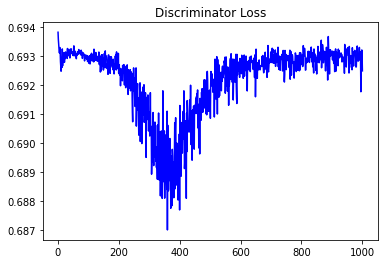

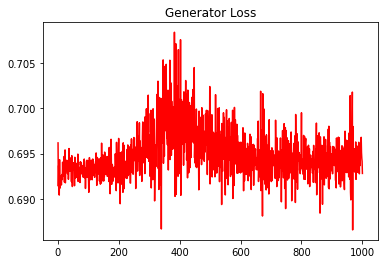

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.012724595811532327


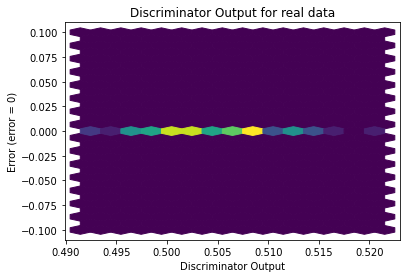

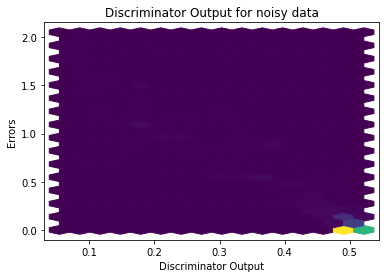

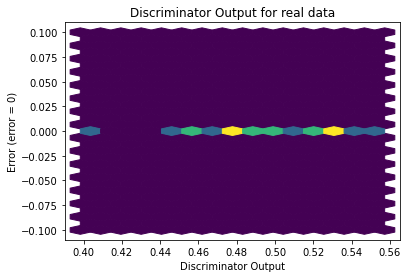

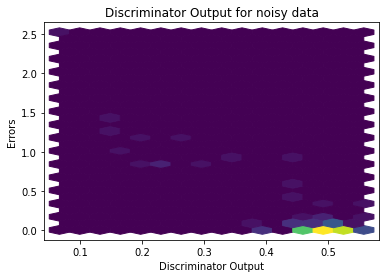

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1227]], requires_grad=True)
